# Hyperspace Analogue To Language (HAL) 
HAL is one of the earliest error-free learning model.

It counts the co-occurrences of words/concepts within a sliding window of five to ten words.

Co-occurrence between any two words is inversely proportinal to the distance between the two words in the window.

This produces a word-by-word co-occurrence matrix that serves as a spatial representation of meaning.

Words with semantic relations are placed close in a high dimensional space.

### Import Natural Language Toolkit (NLTK) and all libraries.

In [13]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### We define the words which are unneccessary in our corpus

In [14]:
stop_words = set(stopwords.words("english"))


### An example Corpus is defined for the model to work on

In [15]:
corpus = [
     "the human body stand on feet which have ankle and toe",
     "the shoulder and leg are part of human body",
     "eye, ear, nose, and face are organ of human body",
     "toe are at the end of leg",
     "bull, dog, kitten, cow, cat are animal that are mammal",
     'oyster is a sea animal',
     'bull and dog have four leg',
     'dog and cat also have four leg',
     'cat love cow',
     'dog attack cow',
     'asia is the biggest continent',
     'china is in asia',
     'france and brazil play football',
     'africa and asia are continent',
     'oyster have whisker are in africa',
     'asia cat have whisker and africa cat do',
     'bull and dog have tail and are animal'
]

### The `corpus` is cleaned using the `NLTK` library

In [16]:
cleaned_corpus = []

for sentence in corpus:
    words = word_tokenize(sentence)
    filtered_words = [word for word in words if word.lower() not in stop_words and word != ',' ]
    cleaned_corpus.append(word_tokenize(" ".join(filtered_words)))

cleaned_corpus

[['human', 'body', 'stand', 'feet', 'ankle', 'toe'],
 ['shoulder', 'leg', 'part', 'human', 'body'],
 ['eye', 'ear', 'nose', 'face', 'organ', 'human', 'body'],
 ['toe', 'end', 'leg'],
 ['bull', 'dog', 'kitten', 'cow', 'cat', 'animal', 'mammal'],
 ['oyster', 'sea', 'animal'],
 ['bull', 'dog', 'four', 'leg'],
 ['dog', 'cat', 'also', 'four', 'leg'],
 ['cat', 'love', 'cow'],
 ['dog', 'attack', 'cow'],
 ['asia', 'biggest', 'continent'],
 ['china', 'asia'],
 ['france', 'brazil', 'play', 'football'],
 ['africa', 'asia', 'continent'],
 ['oyster', 'whisker', 'africa'],
 ['asia', 'cat', 'whisker', 'africa', 'cat'],
 ['bull', 'dog', 'tail', 'animal']]

### Create an empty `matrix` of each concept in the `cleaned_corpus`

In [17]:
matrix = {}
def reset_matrix():  
    global matrix
    matrix = {}
    counter = 0
    for i in range(len(cleaned_corpus)):
        for j in range(len(cleaned_corpus[i])):
            counter += 1
            matrix[cleaned_corpus[i][j]] = {}
        

    matrix
reset_matrix()
matrix

{'human': {},
 'body': {},
 'stand': {},
 'feet': {},
 'ankle': {},
 'toe': {},
 'shoulder': {},
 'leg': {},
 'part': {},
 'eye': {},
 'ear': {},
 'nose': {},
 'face': {},
 'organ': {},
 'end': {},
 'bull': {},
 'dog': {},
 'kitten': {},
 'cow': {},
 'cat': {},
 'animal': {},
 'mammal': {},
 'oyster': {},
 'sea': {},
 'four': {},
 'also': {},
 'love': {},
 'attack': {},
 'asia': {},
 'biggest': {},
 'continent': {},
 'china': {},
 'france': {},
 'brazil': {},
 'play': {},
 'football': {},
 'africa': {},
 'whisker': {},
 'tail': {}}

### Run the HAL model

For each `sentence` in the `cleaned_corpus` loop through its `words` with a `window_size`

And add the `occurence_weight` of the `word` to the `matrix`

$W(A,B) = \frac {1}{|n_A - n_B|}$, where $W$ is the weight added and $n_A$, $n_B$ are the index of words in the sliding window.

In [18]:
def HAL(window_size):
    reset_matrix()
    for i in range(len(cleaned_corpus)):
        sentence_size = len(cleaned_corpus[i])
        for j in range(sentence_size):
            word = cleaned_corpus[i][j]
            window_start = 0
            
            if j - window_size >= 0:
                window_start = j - window_size
            
            window_end = sentence_size

            if j + window_size < sentence_size:
                window_end = j + window_size + 1
            
            for index in range(window_start, window_end):
                if index != j:
                    occurence_weight = 1 / abs(index - j)
                    if cleaned_corpus[i][index] in matrix[word]:
                        matrix[word][cleaned_corpus[i][index]] += occurence_weight
                    else:
                        matrix[word].setdefault(cleaned_corpus[i][index], occurence_weight)

HAL(5)

### Create a dataframe to properly see the high-dimensional matrix

Clean the `df` by filling `NaN` values with 0. 

And `normalize` the df to get weight between 0-1

In [19]:
df = pd.DataFrame(matrix)

df = df.fillna(0)

normalized_df = df/df.max()
normalized_df

,human,body,stand,feet,ankle,toe,shoulder,leg,part,eye,...,biggest,continent,china,france,brazil,play,football,africa,whisker,tail
body,1.000000,0.000000,1.000000,0.500000,0.333333,0.250000,0.250000,0.166667,0.5,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00,0.0
stand,0.166667,0.333333,0.000000,1.000000,0.500000,0.333333,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00,0.0
feet,0.111111,0.166667,1.000000,0.000000,1.000000,0.500000,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00,0.0
ankle,0.083333,0.111111,0.500000,1.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00,0.0
toe,0.066667,0.083333,0.333333,0.500000,1.000000,0.000000,0.000000,0.250000,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00,0.0
shoulder,0.111111,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.5,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00,0.0
leg,0.166667,0.111111,0.000000,0.000000,0.000000,0.500000,1.000000,0.000000,1.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00,0.0
part,0.333333,0.166667,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00,0.0
eye,0.066667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00,0.0
ear,0.083333,0.066667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00,0.0


Thus the similarity and relationship between words is as per the value in the matrix

### Visualize the Matrix

Since a high-dimensional matrix is hard to visualize, we use a `heatmap` for visualization

Text(0.5, 1.0, 'Word-by-Word Relation')

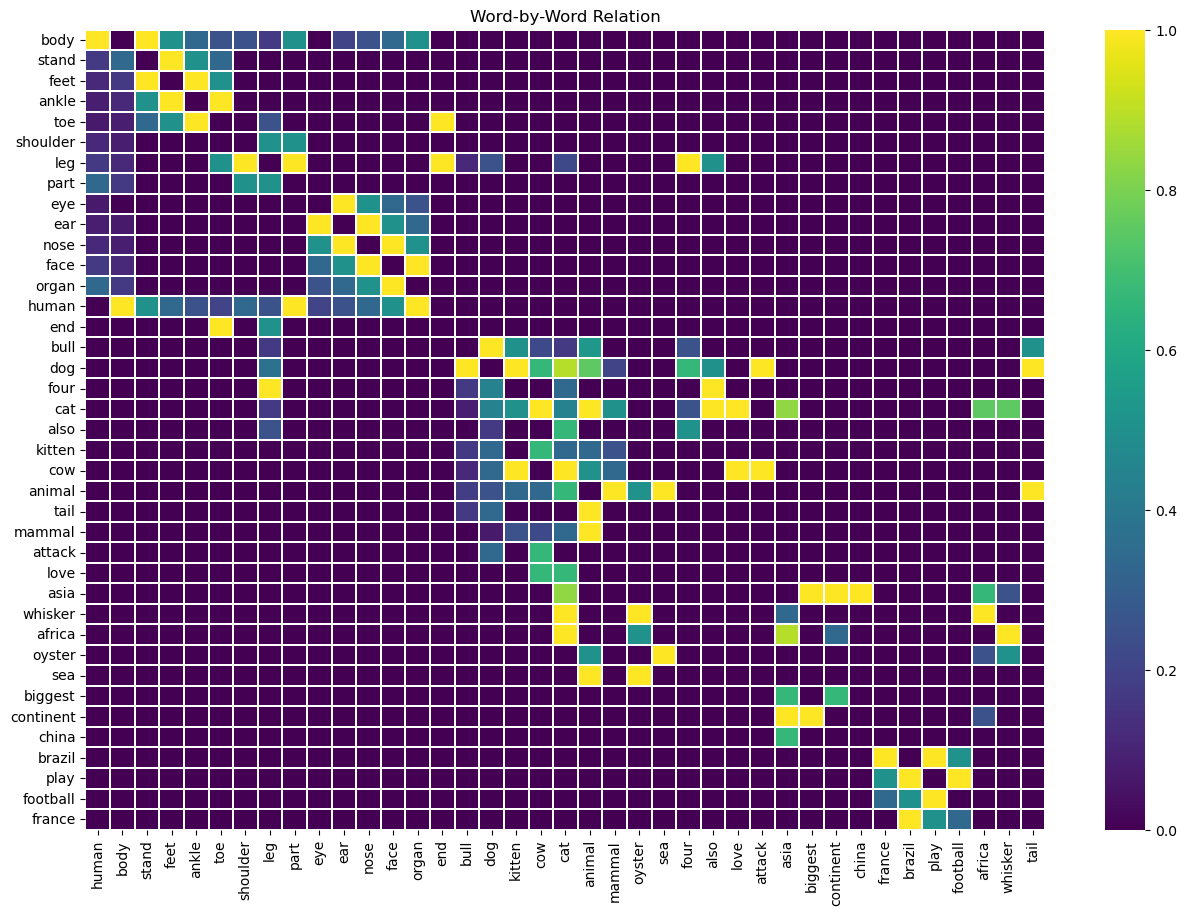

In [20]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_axes([0,0,1,1])

sns.heatmap(normalized_df, cmap='viridis', lw=0.01)
plt.title('Word-by-Word Relation')


The heatmap above shows which words have similar meanings and have relations with each other.
The lighter the color of the cell, the higher the relationship

We can also see how a word's relationship changes by changing the `window_size`

`asia` and `cat`

Thus how is asia related to cat. Probably a Asian Cats have some special features in the corpus!

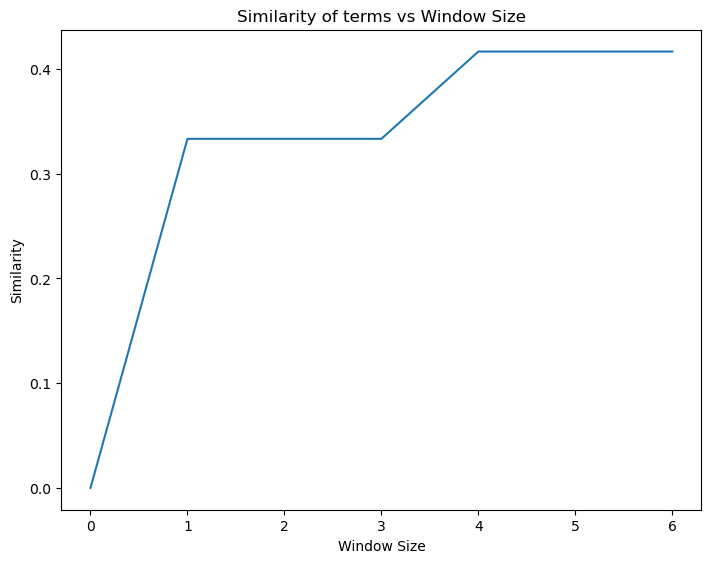

In [21]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = []
y = []
for i in range(7):
    HAL(i)
    x.append(i)
    try:
        y.append(matrix['cat']['asia']/3)
    except KeyError:
        y.append(0)

ax.set_xlabel('Window Size')
ax.set_ylabel('Similarity')
ax.set_title('Similarity of terms vs Window Size')
ax.plot(x,y)




Thus we can see that if we have a large enough corpus and we continue to increase the window size, we will wrongly relate every word. But if the window size is too low, we might miss some relations